# Multiple Integration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import integrate
import sympy
import mpmath
sympy.init_printing()

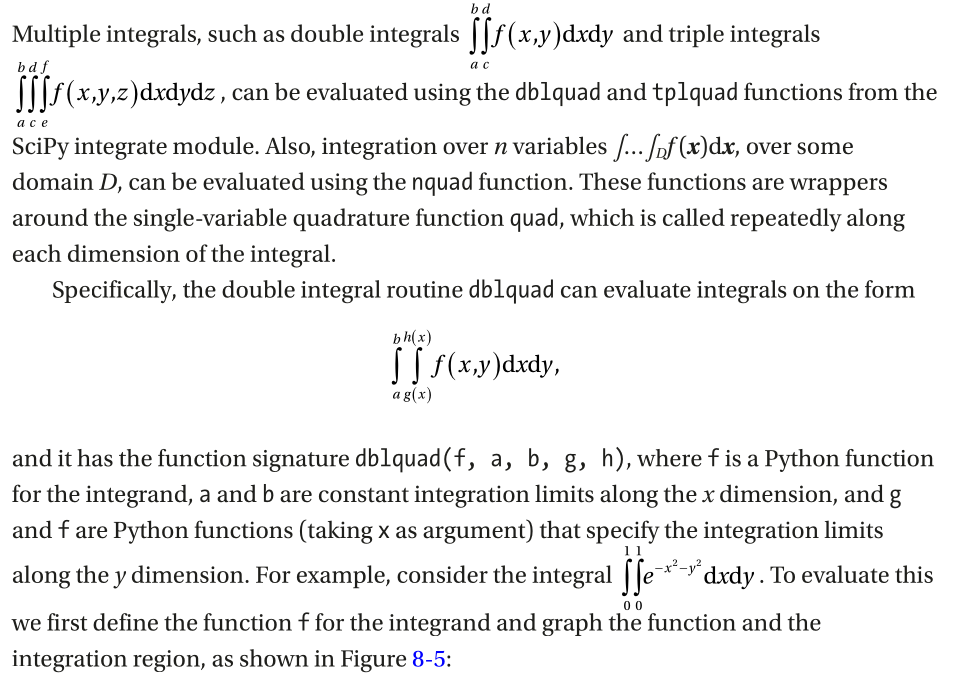

Text(0, 0.5, '$y$')

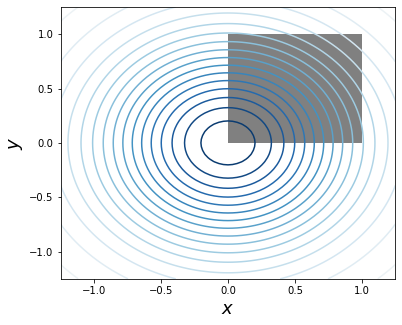

In [11]:
def f(x, y):
    return np.exp(-x**2 - y**2)

x = y = np.linspace(-1.25, 1.25, 75)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(figsize=(6, 5))

c = ax.contour(X, Y, f(X, Y), 15, cmap=mpl.cm.RdBu, vmin=-1, vmax=1)

# Create rect region
bound_rect = plt.Rectangle((0, 0), 1, 1, facecolor="grey")

# Draw the rect
ax.add_patch(bound_rect)

ax.axis('tight')

# Define the axis
ax.set_xlabel('$x$', fontsize=18)
ax.set_ylabel('$y$', fontsize=18)

> Two-dimensional integrand as contour plot with integration region
shown as a shaded area

In this example the integration limits for both the `x` and `y` variables are constants, but
since `dblquad` expects functions for the integration limits for the `y` variable, we must also
define the functions `h` and `g`, even though in this case they only evaluate to constants
regardless of the value of `x`

In [12]:
a, b = 0, 1

g = lambda x: 0
h = lambda x: 1

integrate.dblquad(f, a, b, g, h)

In [13]:
# With all parameters defined in the function arguments
integrate.dblquad(lambda x, y: np.exp(-x**2-y**2), 0, 1, lambda x: 0, lambda x: 1)

Because `g` and `h` are functions, we can compute integrals with `x-dependent` integration
limits along the `y` dimension.

For example, with $g(x) = x − 1$ and $h(x) = 1 − x$, we obtain

In [14]:
integrate.dblquad(f, 0, 1, lambda x: -1 + x, lambda x: 1 - x)

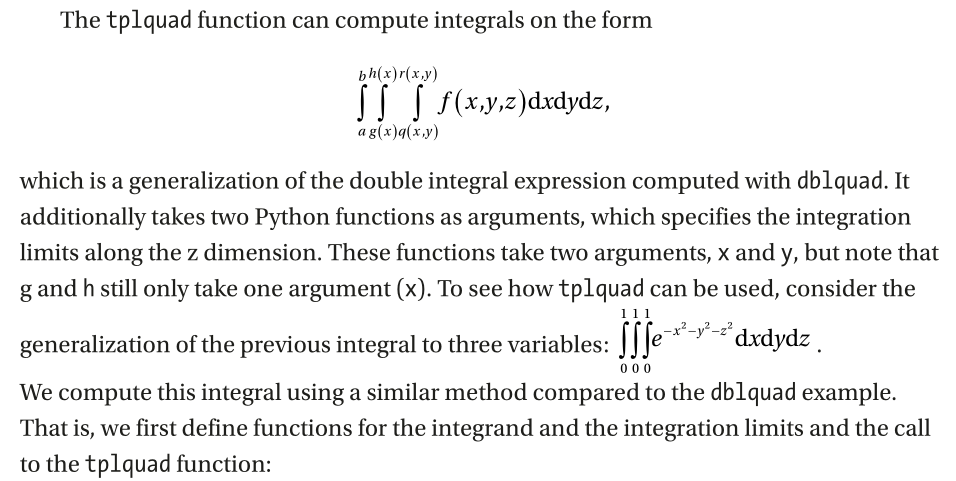

In [17]:
def f(x, y, z):
    return np.exp(-x**2-y**2-z**2)

a, b = 0, 1
g, h = lambda x: 0, lambda x: 1
q, r = lambda x, y: 0, lambda x, y: 1

# Evaluate the tripple integral
integrate.tplquad(f, 0, 1, g, h, q, r)

For an arbitrary number of integrations, we can use the `nquad` function. It also takes
the integrand as a Python function as the first argument. The integrand function should
have the function signature $f(x_1, x_2, \dots , x_n)$. In contrast to `dplquad` and `tplquad`,
the `nquad` function expects a list of integration limit specifications, as the second
argument. The list should contain a tuple with integration limits for each integration
variable or a callable function that returns such a limit. For example, to compute the
integral that we previously computed with `tplquad`, we could use

In [18]:
# The same result as in previous example
integrate.nquad(f, [(0, 1), (0, 1), (0, 1)])

For increasing number of integration variables, the computational complexity of a
multiple integral grows quickly, for example, when using `nquad`. To see this scaling trend,
consider the following generalized version of the integrand studied with `dplquad` and
`tplquad`

In [19]:
# Make dynamic number of variables in the function
def f(*args):
    """
    f(x1, x2, ... , xn) = exp(-x1^2 - x2^2 - ... – xn^2)
    """
    return np.exp(-np.sum(np.array(args)**2))

To see a rough estimate of the computation time, we use the
IPython command %time

In [20]:
%time integrate.nquad(f, [(0,1)] * 1)

CPU times: user 0 ns, sys: 439 µs, total: 439 µs
Wall time: 455 µs


In [22]:
%time integrate.nquad(f, [(0,1)] * 2)

CPU times: user 5.83 ms, sys: 822 µs, total: 6.65 ms
Wall time: 6.45 ms


In [23]:
%time integrate.nquad(f, [(0,1)] * 3)

CPU times: user 95.5 ms, sys: 0 ns, total: 95.5 ms
Wall time: 93.9 ms


In [24]:
%time integrate.nquad(f, [(0,1)] * 4)

CPU times: user 1.69 s, sys: 1.27 ms, total: 1.69 s
Wall time: 1.7 s


### Very slow integration by 5 multuple integral!

In [26]:
%time integrate.nquad(f, [(0,1)] * 5)

CPU times: user 34.5 s, sys: 6.6 ms, total: 34.5 s
Wall time: 34.7 s


#### Here we see that increasing the number of integrations from one to five increases the computation time from hundreds of microseconds to nearly a half-minute!

## Monte Carlo Estimation Methods

Linear Algebra and Lerning from Data by Gil. Strang p. 272

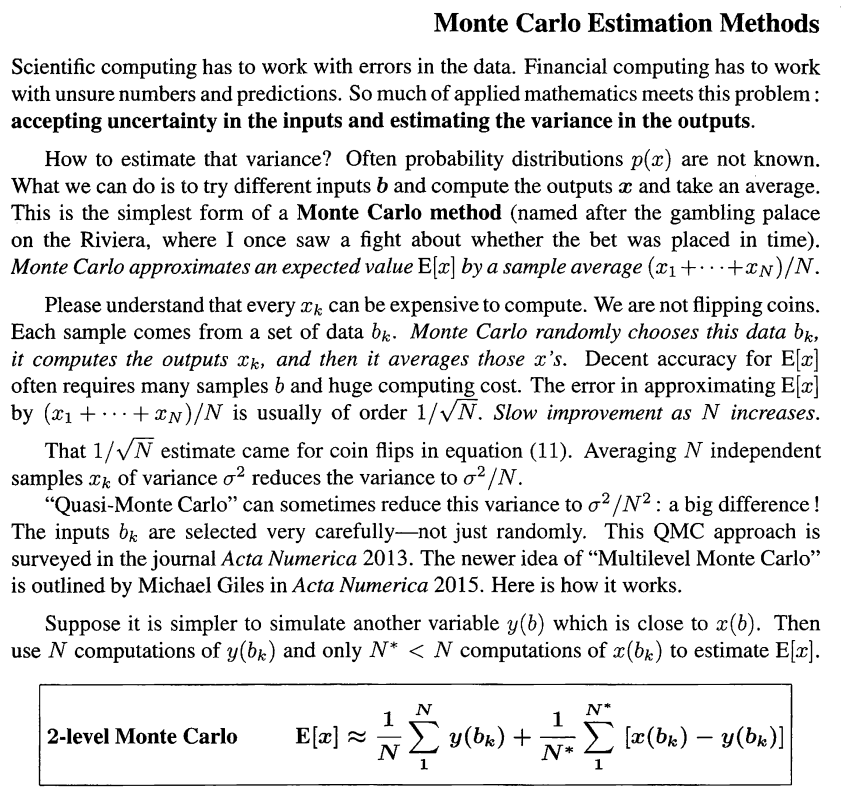

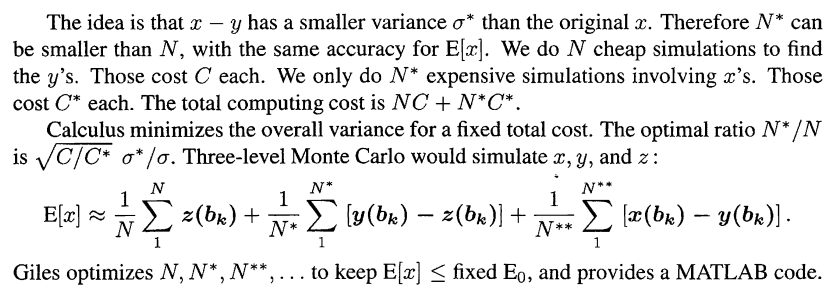

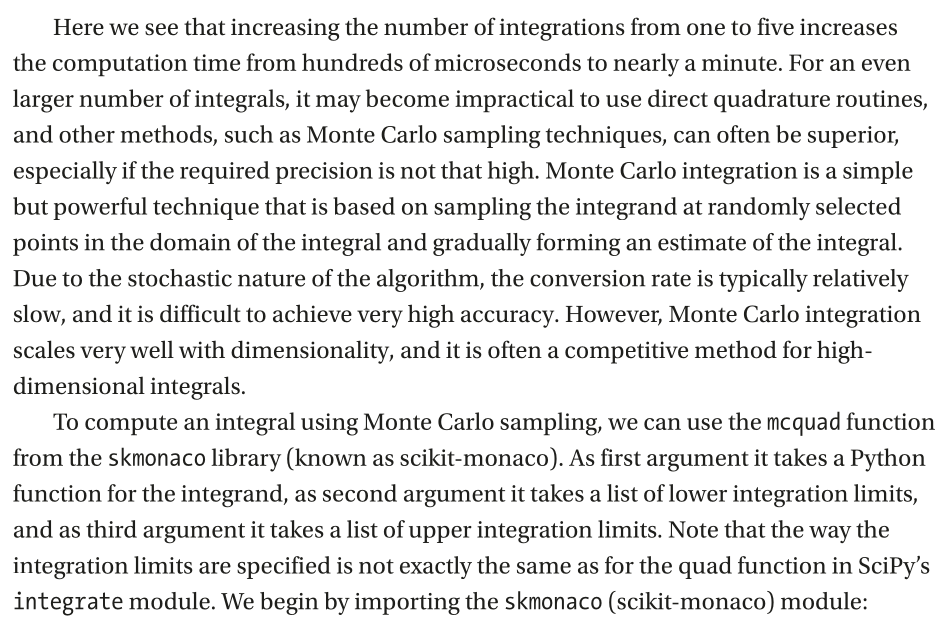

In [1]:
# Can't install!
## import skmonacor

Once the module is imported, we can use the `skmonaco.mcquad` function for
performing a Monte Carlo integration. In the following example, we compute the same
integral as in the previous example using `nquad`:

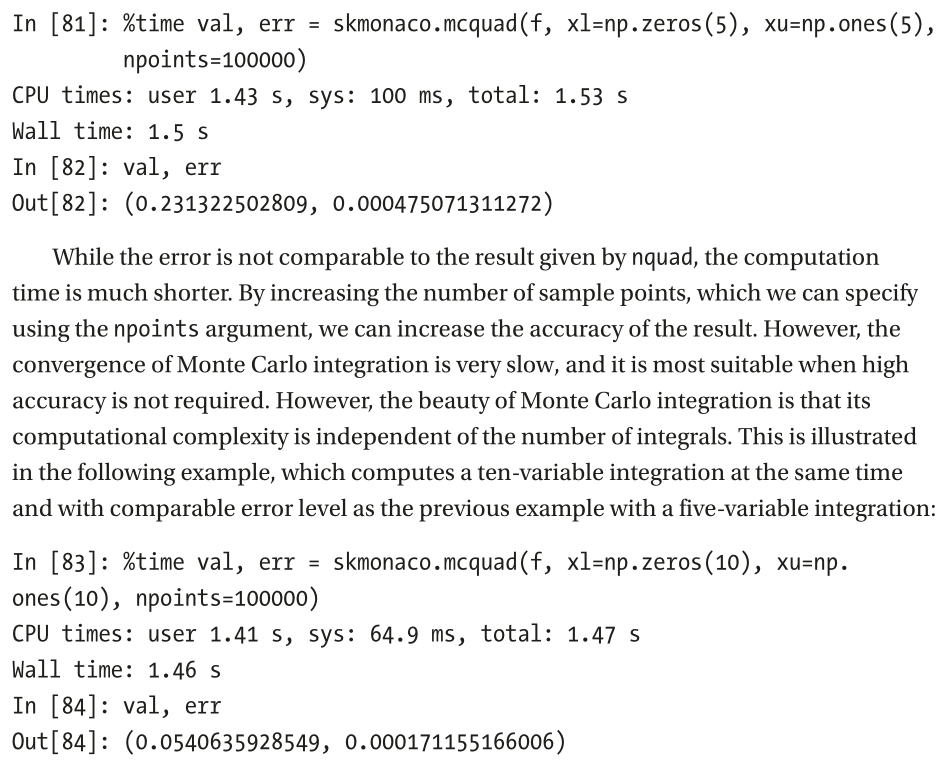